$Question1$

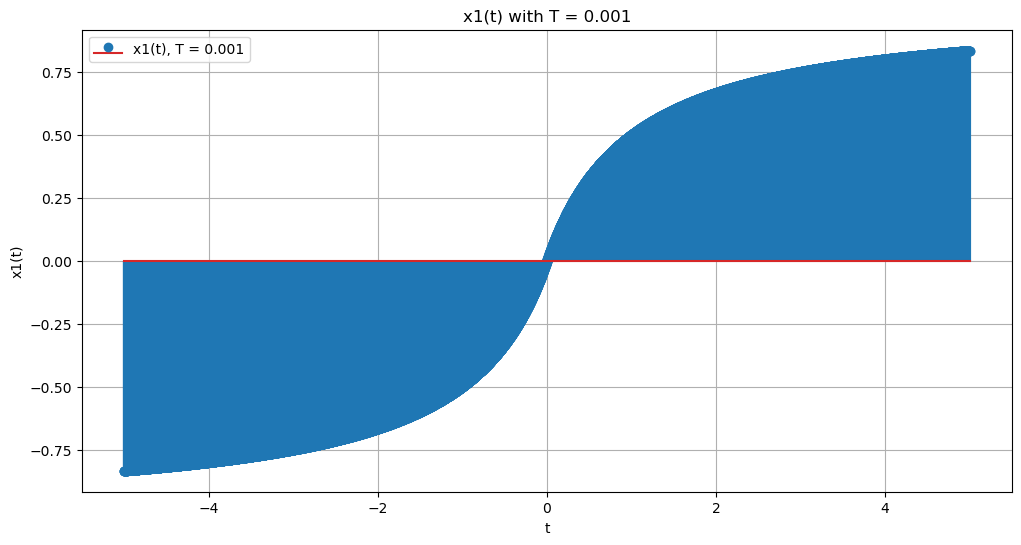

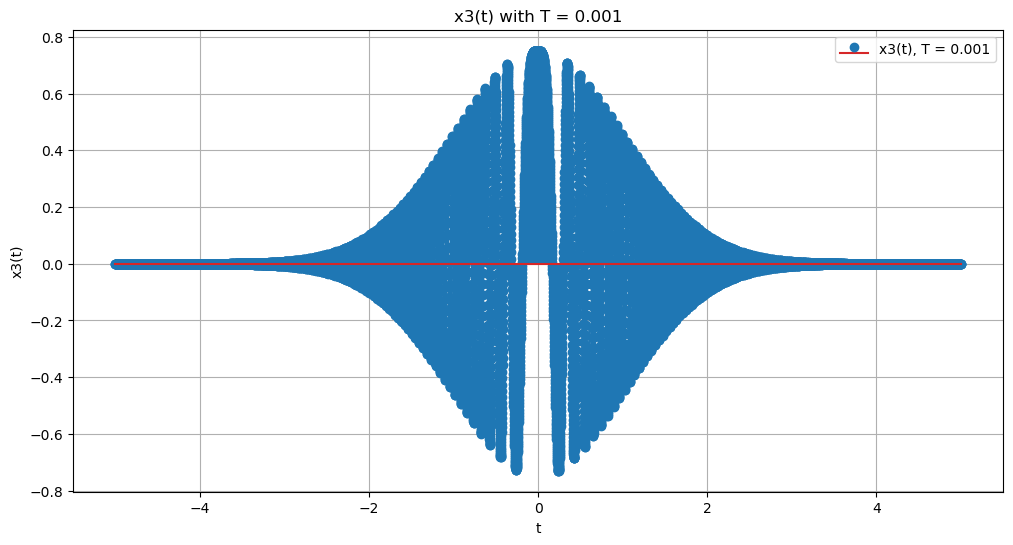

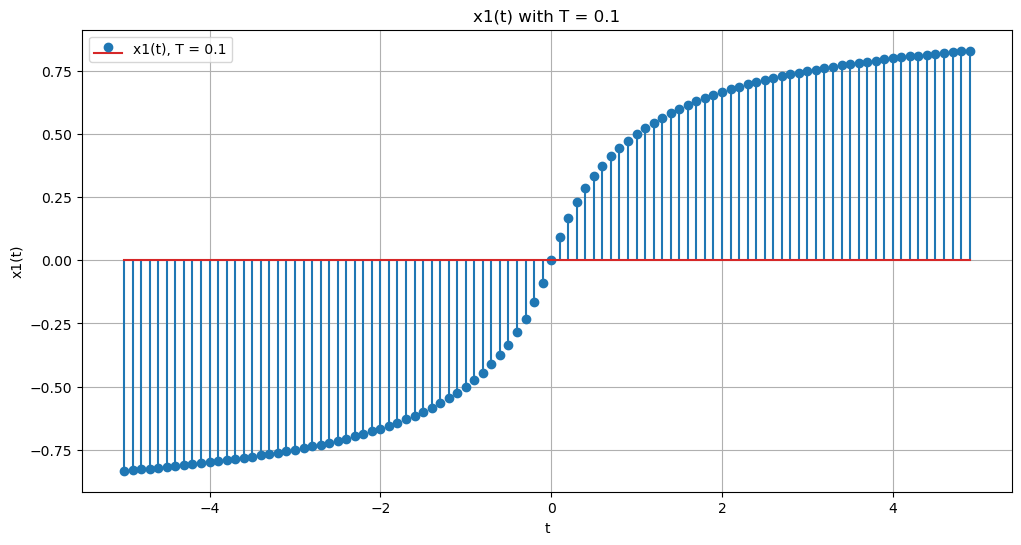

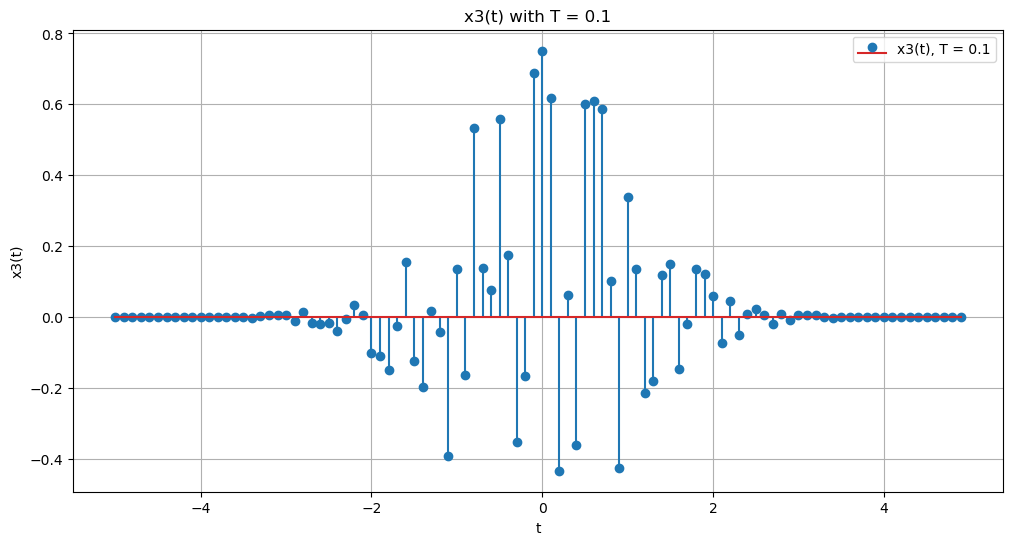

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T_values = [0.001, 0.1]
t_min, t_max = -5, 5
alpha = 1
beta = 100
gamma = 1

for T in T_values:
    # Generate t values
    t = np.arange(t_min, t_max, T )

    # Compute x1(t)
    x1 = t / (1 + np.abs(t))

    # Compute x3(t)
    term = np.exp(-alpha * t**2 / 2 + 1j * (beta * t**2 / 2 + gamma * t))
    x3 = np.real((alpha / np.pi)**0.25 * term)

    # Plot x1(t)
    plt.figure(figsize=(12, 6))
    plt.stem(t, x1, label=f'x1(t), T = {T}')
    plt.title(f'x1(t) with T = {T}')
    plt.xlabel('t')
    plt.ylabel('x1(t)')
    plt.grid()
    
    plt.legend()
    plt.savefig("x1(t)", format="pdf")

    plt.show()
    
    


    # Plot x3(t)
    plt.figure(figsize=(12, 6))
    plt.stem(t, x3, label=f'x3(t), T = {T}')
    plt.title(f'x3(t) with T = {T}')
    plt.xlabel('t')
    plt.ylabel('x3(t)')
    plt.grid()
    plt.legend()
    plt.savefig("x2(t)", format = "pdf")
    plt.show()


In [39]:
import sympy as smp
import numpy as np
x = smp.symbols("x")
from sympy import *

t = smp.symbols("t")
z = smp.symbols("z")
m = smp.symbols("m")

In [40]:

expr3 = 2 / smp.sqrt(smp.pi) * smp.exp(-t**2)

In [41]:
expr3

2*exp(-t**2)/sqrt(pi)

In [42]:
smp.integrate(expr3, (t, 0, x/smp.sqrt(2)))

erf(sqrt(2)*x/2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


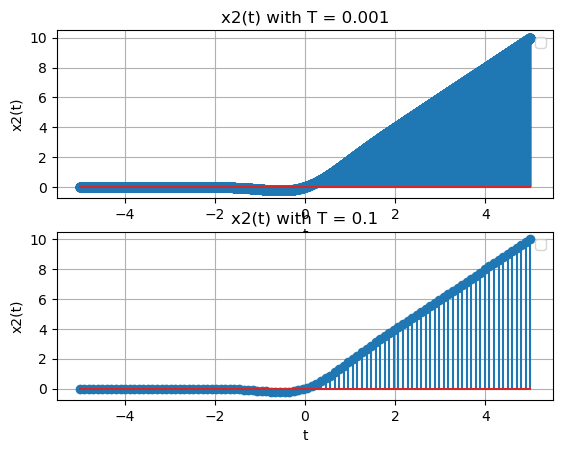

In [43]:
t_sym = smp.symbols('t')

h2 = t_sym * (1 + ((2 / smp.sqrt(smp.pi)) * smp.integrate(smp.exp(-t_sym**2), (t_sym, 0, t_sym))))
h2_func = smp.lambdify(t_sym, h2, 'numpy')
t1 = np.linspace(-5, 5, 10000)
t2 = np.linspace(-5,5, 100)

h2_sam = np.array([h2_func(t_val) for t_val in t1])
plt.subplot(2, 1, 1)
plt.title("x2(t) with T = 0.001")
plt.xlabel('t')
plt.ylabel('x2(t)')
plt.grid()
plt.legend()
plt.stem(t1, h2_sam)
plt.savefig("x2(t)", format="pdf")
h2_sam_ = np.array([h2_func(t_val) for t_val in t2])

plt.subplot(2, 1, 2)
plt.title("x2(t) with T = 0.1")
plt.xlabel('t')
plt.ylabel('x2(t)')
plt.grid()
plt.legend()
plt.stem(t2, h2_sam_)
plt.savefig("x2(t)", format="pdf")


$Question 2$

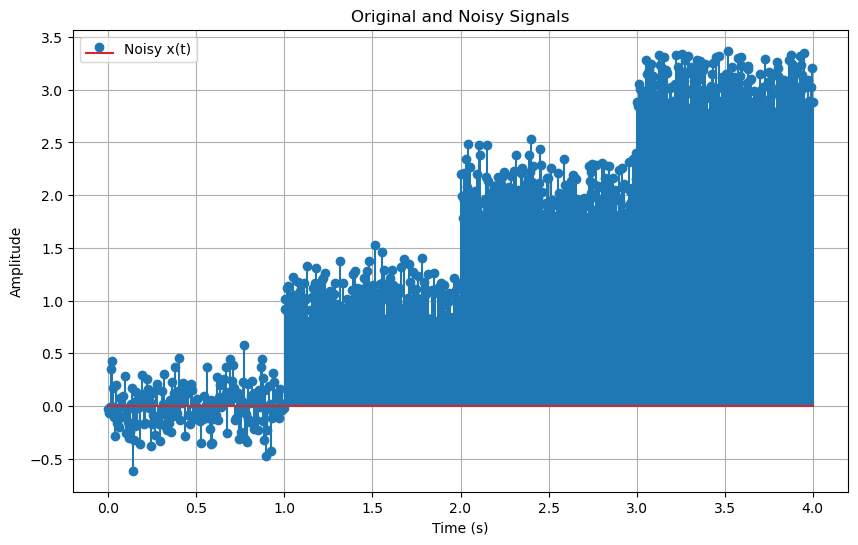

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Heaviside, lambdify

t = symbols('t')

x = Heaviside(t - 1) + Heaviside(t - 2) + Heaviside(t - 3)
x_func = lambdify(t, x, modules=["numpy"])

StopTime = 4
Fs = 200
time = np.linspace(0, StopTime,  StopTime*Fs)



x_values = x_func(time)
noise = np.random.normal(loc=0, scale=np.sqrt(0.04), size=len(time))  # Gaussian noise with variance 0.04


xn = x_values + noise

plt.figure(figsize=(10, 6))

plt.stem(time, xn, label='Noisy x(t)')



plt.title('Original and Noisy Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.savefig("original and noisy signals(t)", format="pdf")


**Question 2 Part 1**

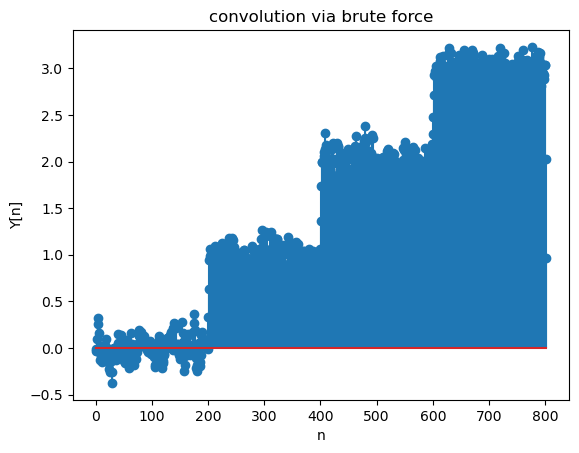

In [45]:
import numpy as np

hn = (1 / 3) * np.array([1, 1, 1])  # Example impulse response


yn = np.zeros(len(xn) + len(hn) - 1)


for n in range(len(yn)):
    for k in range(len(xn)):
        if 0 <= n - k < len(hn):
            yn[n] += xn[k] * hn[n - k]




n =np.linspace(0,len(yn),len(yn))
plt.stem(n,yn)


plt.title('convolution via brute force')
plt.ylabel('Y[n]')
plt.xlabel('n')
plt.savefig("convolution via brute force(t)", format="pdf")

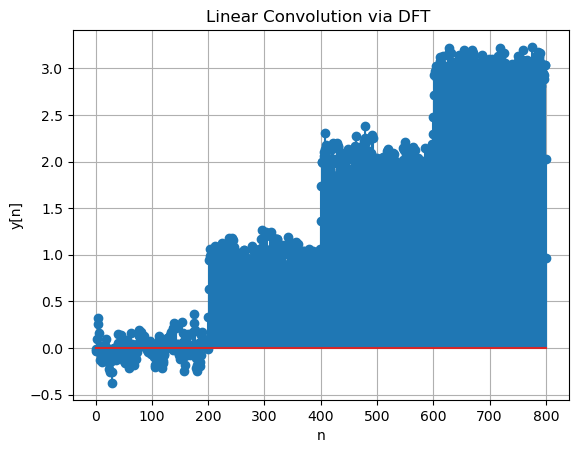

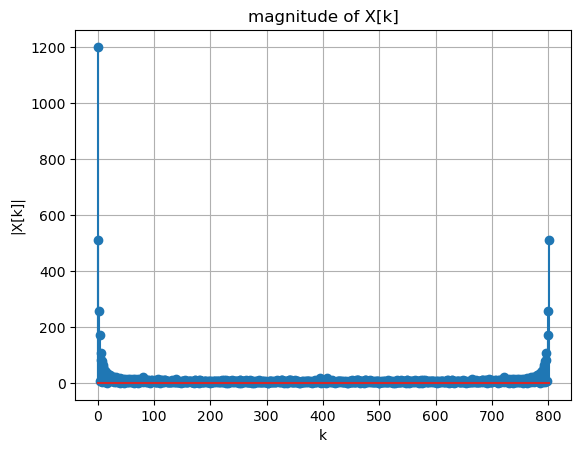

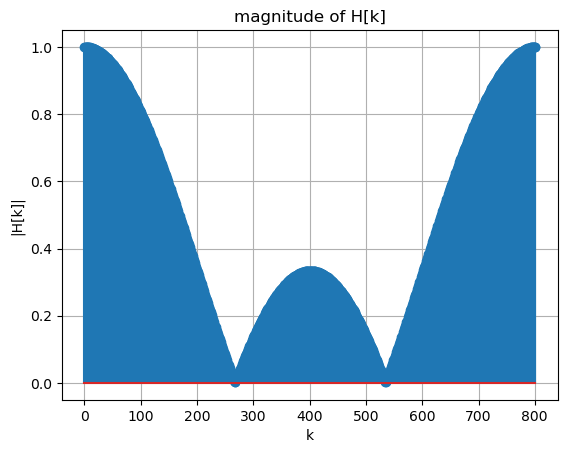

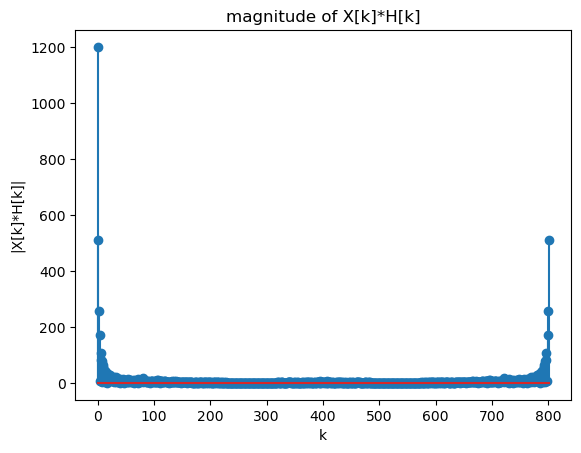

<Figure size 640x480 with 0 Axes>

In [47]:
import numpy as np

A = len(xn)
B = len(hn)
Q = A + B - 1
x_n_padded = np.pad(xn, (0, B - 1), 'constant')
h_n_padded = np.pad(hn, (0, A - 1), 'constant')

def dft1(q):
    X_k = np.zeros(len(q), dtype=complex)
    for k in range(len(q)):
        for n in range(len(q)):
            X_k[k] += q[n] * np.exp(-2j * np.pi * k * n / len(q))  # Corrected to use `q[n]` without real-only cast
    return X_k

def dft2(p):
    H_k = np.zeros(len(p), dtype=complex)
    for k in range(len(p)):
        for n in range(len(p)):
            H_k[k] += p[n] * np.exp(-2j * np.pi * k * n / len(p))  # Corrected to use `p[n]` without real-only cast
    return H_k

X_k = dft1(x_n_padded)
H_k = dft2(h_n_padded)
magnitude_X_k = np.abs(X_k)
magnitute_H_k = np.abs(H_k)

result = X_k * H_k
magnitute_result = np.abs(result)

y = np.fft.ifft(result).real
q = np.arange(len(y))

plt.stem(q, y)
plt.title("Linear Convolution via DFT ")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid()
plt.show()
plt.savefig("linear convolution via DFT)", format="pdf")

plt.stem(q, magnitude_X_k)
plt.title("magnitude of X[k]")
plt.xlabel("k")
plt.ylabel("|X[k]|")
plt.grid()
plt.show()
plt.savefig("magnitude of X_K", format="pdf")

plt.stem(q, magnitute_H_k)
plt.title("magnitude of H[k]")
plt.xlabel("k")
plt.ylabel("|H[k]|")
plt.grid()
plt.show()
plt.savefig("magnitude OF H_k", format="pdf")

plt.stem(q, magnitute_result)
plt.title("magnitude of X[k]*H[k]")
plt.xlabel("k")
plt.ylabel("|X[k]*H[k]|")
plt.show()
plt.savefig("X_k * H_k", format="pdf")

**Part 2 of Problem 2**

In [16]:

### part 2 of question 1
n = len(h_n_padded)
H = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        H[j, i] = h_n_padded[(j - i) % n]

print(H)


[[0.33333333 0.         0.         ... 0.         0.33333333 0.33333333]
 [0.33333333 0.33333333 0.         ... 0.         0.         0.33333333]
 [0.33333333 0.33333333 0.33333333 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.33333333 0.         0.        ]
 [0.         0.         0.         ... 0.33333333 0.33333333 0.        ]
 [0.         0.         0.         ... 0.33333333 0.33333333 0.33333333]]


*Question3*

In [28]:
from scipy.linalg import circulant

h_padded = np.pad(hn, (0, len(xn) - 3), 'constant')








n = len(h_padded)
Q = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        Q[j, i] = h_padded[(j - i) % n]

print(Q)

C = circulant(h_padded)
print(C)

[[0.33333333 0.         0.         ... 0.         0.33333333 0.33333333]
 [0.33333333 0.33333333 0.         ... 0.         0.         0.33333333]
 [0.33333333 0.33333333 0.33333333 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.33333333 0.         0.        ]
 [0.         0.         0.         ... 0.33333333 0.33333333 0.        ]
 [0.         0.         0.         ... 0.33333333 0.33333333 0.33333333]]
[[0.33333333 0.         0.         ... 0.         0.33333333 0.33333333]
 [0.33333333 0.33333333 0.         ... 0.         0.         0.33333333]
 [0.33333333 0.33333333 0.33333333 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.33333333 0.         0.        ]
 [0.         0.         0.         ... 0.33333333 0.33333333 0.        ]
 [0.         0.         0.         ... 0.33333333 0.33333333 0.33333333]]


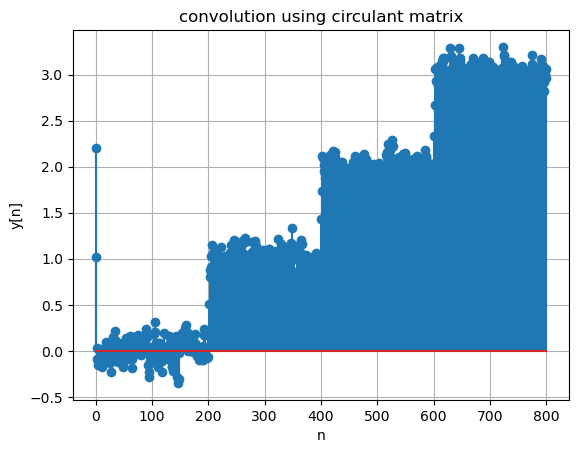

In [36]:
y = np.dot(Q, xn)
#print(y)

z = np.linspace(0,len(y),len(y))
plt.stem(z,y)
plt.title("convolution using circulant matrix")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid()
plt.savefig("convolution using circulant matrix", format="pdf")
plt.show()

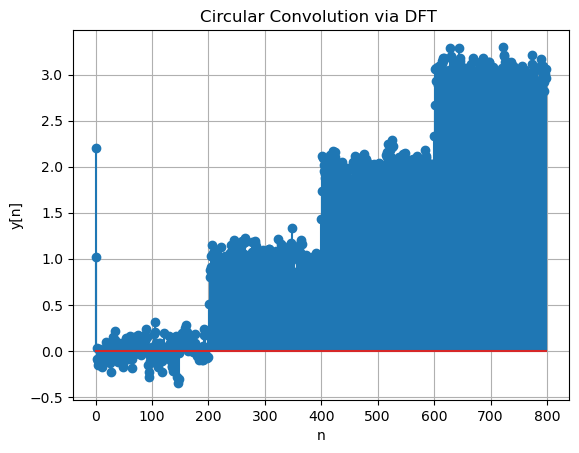

In [24]:
import numpy as np

A = len(xn)
B = len(hn)
Q = A - B

h_n_padded = np.pad(hn, (0, A - B), 'constant')

def dft1(q):
    X_k = np.zeros(len(q), dtype=complex)
    for k in range(len(q)):
        for n in range(len(q)):
            X_k[k] += q[n] * np.exp(-2j * np.pi * k * n / len(q))
    return X_k

def dft2(p):
    H_k = np.zeros(len(p), dtype=complex)
    for k in range(len(p)):
        for n in range(len(p)):
            H_k[k] += p[n] * np.exp(-2j * np.pi * k * n / len(p))
    return H_k

X_k_N = dft1(xn)
H_k_N = dft2(h_n_padded)

result = X_k_N * H_k_N

y_N = np.fft.ifft(result).real
q = np.arange(len(y_N))

plt.stem(q, y_N)
plt.title("Circular Convolution via DFT ")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid()
plt.savefig("circular Convolution using DFT", format="pdf")

plt.show()


/Users/bhaskar/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/Users/bhaskar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


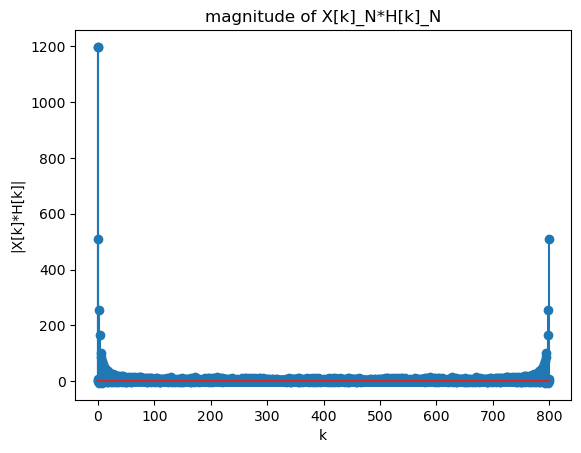

In [26]:

magnitude_X_k = np.abs(X_k_N)
magnitute_H_k = np.abs(H_k_N)

result_N = X_k_N * H_k_N
magnitute_result_N = np.abs(result_N)


q = np.arange(len(y_N))



plt.stem(q, magnitude_X_k)
plt.title("magnitude of X_N[k]")
plt.xlabel("k")
plt.ylabel("|X_N[k]|")
plt.grid()

plt.savefig("1_X", format="pdf")

plt.stem(q, magnitute_H_k)
plt.title("magnitude of H[k]_N")
plt.xlabel("k")
plt.ylabel("|H[k]_N|")
plt.grid()

plt.savefig("2", format="pdf")

plt.stem(q, result_N)
plt.title("magnitude of X[k]_N*H[k]_N")
plt.xlabel("k")
plt.ylabel("|X[k]*H[k]|")

plt.savefig("3", format="pdf")